# Example 4: Simulated site profile

Generate simulated shear-wave velocity profiles.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pysra

%matplotlib inline

In [2]:
# Increased figure sizes
plt.rcParams['figure.dpi'] = 120

Create a simple site profile

In [3]:
profile = pysra.site.Profile([
    pysra.site.Layer(pysra.site.SoilType('Soil-1', 18., None, 0.05), 30, 400),
    pysra.site.Layer(pysra.site.SoilType('Soil-2', 19., None, 0.05), 20, 600),
    pysra.site.Layer(pysra.site.SoilType('Rock', 24., None, 0.01), 0, 1200),
])

Initialize the variations.

In [4]:
toro_thickness = pysra.variation.ToroThicknessVariation()
toro_velocity = pysra.variation.ToroVelocityVariation.generic_model('USGS B')

Create the varied thickness and velocity.

In [5]:
count = 10
# Create realizations of the profile with varied thickness
varied_thick = [toro_thickness(profile) for _ in range(count)]

# For eaach realization of varied thickness, vary the shear-wave velocity
varied_vel = [toro_velocity(rt) for rt in varied_thick]

Create a plot of the varied velocity models.

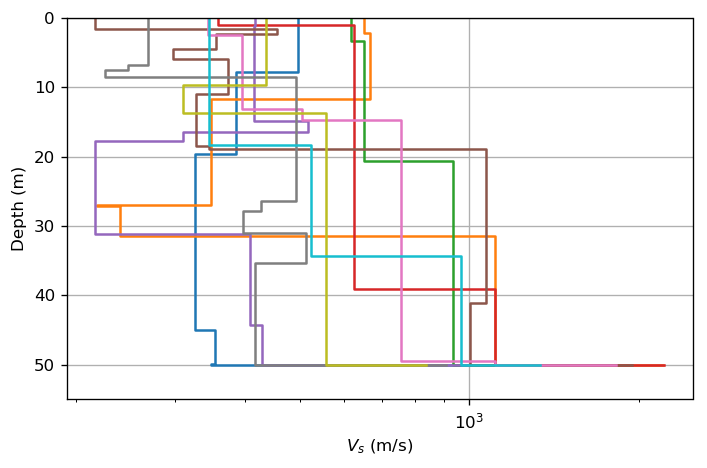

In [6]:
fig, ax = plt.subplots()

for p in varied_vel:
    ax.plot(
        [l.initial_shear_vel for l in p], [l.depth for l in p],
        drawstyle='steps-pre')

ax.set(xlabel='$V_s$ (m/s)', xscale='log',
       ylabel='Depth (m)', ylim=(55, 0))

ax.grid()
fig.tight_layout();